In [1]:
from sympy import *
from sympy.plotting import plot_parametric

In [2]:
A = Matrix([[12, 9],
            [-16, -12]])
A

Matrix([
[ 12,   9],
[-16, -12]])

In [5]:
B = Matrix([[2],
            [-1]])
B

Matrix([
[ 2],
[-1]])

In [6]:
x0 = Matrix([[3],
             [-4]])
x0

Matrix([
[ 3],
[-4]])

In [7]:
x1 = zeros(2, 1)
x1

Matrix([
[0],
[0]])

In [8]:
eigs = A.eigenvects()
pprint(eigs)

⎡⎛      ⎡⎡-3/4⎤⎤⎞⎤
⎢⎜0, 2, ⎢⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 1  ⎦⎦⎠⎦


In [9]:
v = eigs[0][2][0]
u = A.pinv() @ v
u

Matrix([
[ -1/25],
[-3/100]])

In [25]:
t, tau, t1 = symbols('t tau t1', real=True, nonnegative=True)
t0 = 0

In [19]:
Phi = v.col_insert(1, t * v + u)
Phi

Matrix([
[-3/4, -3*t/4 - 1/25],
[   1,     t - 3/100]])

In [20]:
expA = Phi @ Phi.subs(t, 0).pinv()
expA

Matrix([
[12*t + 1,      9*t],
[   -16*t, 1 - 12*t]])

In [23]:
H = -expA.subs(t, t0 - tau) @ B
H

Matrix([
[15*tau - 2],
[1 - 20*tau]])

In [24]:
l1, l2 = symbols('l1 l2', real=True)
l = Matrix([[l1],
            [l2]])
l

Matrix([
[l1],
[l2]])

$$
\left< l, x \right> = 1, \quad l2 = \frac{3}{4}l1 - \frac{1}{4}
$$

In [44]:
simplify(integrate((H.T @ l) ** 2, (tau, t0, t1))[0])

t1*(12*l1**2 - 12*l1*l2 + 3*l2**2 + t1**2*(225*l1**2 - 600*l1*l2 + 400*l2**2) + 15*t1*(-6*l1**2 + 11*l1*l2 - 4*l2**2))/3

In [29]:
L = integrate((H.T @ l) ** 2, (tau, t0, t1)).subs(l2, 3 * l1 / 4 - Rational(1, 4))[0]
L

t1**3*(75*l1**2 - 200*l1*(3*l1/4 - 1/4) + 400*(3*l1/4 - 1/4)**2/3) + t1**2*(-30*l1**2 + 55*l1*(3*l1/4 - 1/4) - 20*(3*l1/4 - 1/4)**2) + t1*(4*l1**2 - 4*l1*(3*l1/4 - 1/4) + (3*l1/4 - 1/4)**2)

In [30]:
sol = solve(L.diff(l1), l1)
sol

[2*t1 - 1/5]

In [31]:
l1_opt = sol[0]
l1_opt

2*t1 - 1/5

In [36]:
l2_opt = 3 * l1_opt / 4 - Rational(1, 4)
l2_opt

3*t1/2 - 2/5

In [37]:
l_opt = Matrix([[l1_opt],
                [l2_opt]])
l_opt

Matrix([
[  2*t1 - 1/5],
[3*t1/2 - 2/5]])

In [38]:
expr = simplify(integrate((H.T @ l_opt) ** 2, (tau, t0, t1))[0])
expr

25*t1**3/12

In [41]:
sol = solve(expr - 1, t1)
sol[0]

60**(1/3)/5

In [42]:
t1_opt = sol[0]

In [49]:
u_opt = simplify(((H.T @ l_opt)[0] / integrate(((H.T @ l_opt)[0]) ** 2, (tau, t0, t1_opt))).subs(t1, t1_opt))
u_opt

5*tau - 60**(1/3)/2

In [52]:
x_opt = simplify(integrate(expA.subs(t, t - tau) @ B * u_opt, (tau, t1_opt, t)))
x_opt

Matrix([
[  25*t**3/2 - 15*60**(1/3)*t**2/4 + 5*t**2 - 60**(1/3)*t + 3],
[-50*t**3/3 - 5*t**2/2 + 5*60**(1/3)*t**2 + 60**(1/3)*t/2 - 4]])

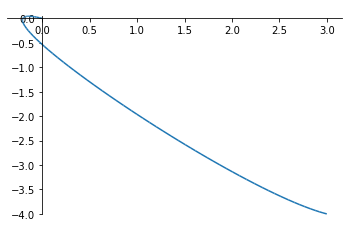

In [55]:
plot_parametric(x_opt[0], x_opt[1], (t, t0, t1_opt))

Тут все ОК, если без управления, то мы сидим тихо в $x_0$ и не рыпаемся

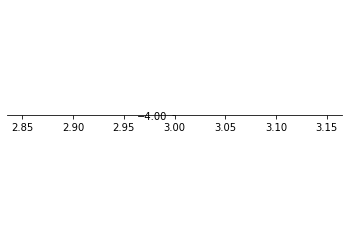

In [59]:
plot_parametric((expA @ x0)[0], (expA @ x0)[1], (t, t0, t1_opt))